## ML Model to Detect Breast Cancer

First, we will import all the PyData modules and the breast cancer dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
# Test printing of data
breast_cancer_data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In the previous code block's last line, we printed the first row of the dataset. Now, let us see what each value in the dataset signifies.

In [3]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In the following two code blocks, we will see what the different possible outputs and the output labels are for a given input data.

In [4]:
print(breast_cancer_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [5]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


From looking at the dataset, it is clear that 'malignant' is denoted as **0** and 'benign' is denoted by **1**.

Now, let us create the model to classify the dataset to get some predictions. Here, we will be using the K-Nearest-Neighbors (KNN) algorithm for classifying a tumor as either malignant (cancerous) or benign (non-cancerous). 

To train and validate the model, we will be splitting it into training and validation sets. 

The test set will comprise of 20% of the dataset. We need to select the best k-value (the number of nearest neighbors to be considered for classification of a point) and the random state.

As an example, we will set the random state as 100 and then plot the r^2 score for k-values in the range 1-100 against the accuracy values.

In [6]:
from sklearn.model_selection import train_test_split as Tts
from sklearn.neighbors import KNeighborsClassifier

training_data, validation_data, training_labels, validation_labels = Tts(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

accuracies = []
for i in range(1,101):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))

k_list = list(range(1,101))


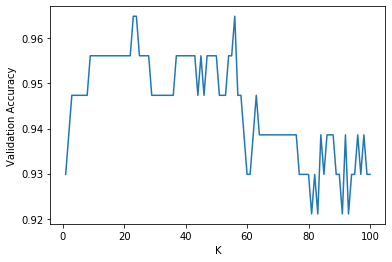

In [7]:
plt.plot(k_list, accuracies)
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.show()

For highest accuracy at random state = 100, the following code block will fetch us the best k-value. 

In [8]:
bestK = accuracies.index(max(accuracies)) + 1
print("Best k-value: ", bestK)
print("Accuracy % at k={} : {}".format( bestK, max(accuracies)*100))

Best k-value:  23
Accuracy % at k=23 : 96.49122807017544


At random state = 100 and k = 23, we get an accuracy of 96.5%, which is signficantly high. But, there are chances we can get an even higher score for accuracy. Therefore, we will now try to get the highest possible score, and then use the random-state values and k-values for that model to train our final breast cancer prediction model.

Selecting the best value of k and random state so we can achieve maximum accuracy.

In [9]:
highest_score = []
for i in range(1, len(breast_cancer_data.data)+1):
    training_data, validation_data, training_labels, validation_labels = Tts(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = i)
    accuracies = []
    for j in range(1,101):
      classifier = KNeighborsClassifier(n_neighbors = j)
      classifier.fit(training_data, training_labels)
      accuracies.append(classifier.score(validation_data, validation_labels))
    highest_score.append([max(accuracies), i, (accuracies.index(max(accuracies)) + 1)])
    
highest_score.sort(reverse = True)                         
bestRandom = highest_score[0][1]
bestK = highest_score[0][2]
highestAccuracy = highest_score[0][0]
print("Best random-state value: {}\nBest k-value: {}\nHighest accuracy achieved: {}".format(bestRandom, bestK, highestAccuracy))

Best random-state value: 403
Best k-value: 3
Highest accuracy achieved: 0.9912280701754386


Since the k-value is very low, the model will experience overfitting. As a result, the outliers will overshadow the major patterns in the dataset. Hence, we need to find a k-value that is high enough for a perfect fit while also maintaining the accuracy of the model.

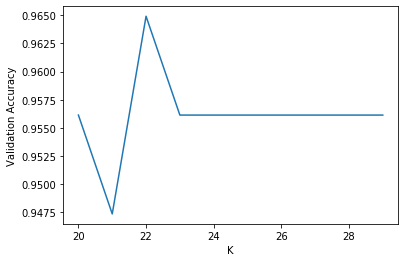

In [12]:
accuracies = []
for i in range(20,30):
  classifier = KNeighborsClassifier(n_neighbors = i)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))

k_list = list(range(20,30))
plt.plot(k_list, accuracies)
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.show()

From the visualization, it seems that k = 22 is the vest value for the model. Finally, we will train our final model. 

Finally, we will train the final model with the discovered best values.

In [16]:
bestK = 22
bestRandom = 403
training_data, validation_data, training_labels, validation_labels = Tts(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = bestRandom)
cancer_classifier = KNeighborsClassifier(n_neighbors = bestK)
cancer_classifier.fit(training_data, training_labels)

print("The accuracy of the model is : {}".format(cancer_classifier.score(validation_data, validation_labels)*100))

The accuracy of the model is : 97.36842105263158


Finally, this model can be used to find whether a breast tumor is cancerous or non-cancerous with an accuracy of 97%.